In [54]:
#!unzip -qq dataset.zip

In [55]:
import os, shutil, pathlib

original_dir = pathlib.Path("./dataset/train/")
new_base_dir = pathlib.Path("./cats_vs_dogs_2000")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [56]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [57]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [58]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [59]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [60]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [61]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [62]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [63]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [64]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [65]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
125/125 [==============================] - 11s 66ms/step - loss: 0.6892 - accuracy: 0.5493 - val_loss: 0.6530 - val_accuracy: 0.6210
Epoch 2/30
125/125 [==============================] - 7s 53ms/step - loss: 0.6591 - accuracy: 0.6140 - val_loss: 0.6488 - val_accuracy: 0.6340
Epoch 3/30
125/125 [==============================] - 7s 54ms/step - loss: 0.6130 - accuracy: 0.6678 - val_loss: 0.6230 - val_accuracy: 0.6710
Epoch 4/30
125/125 [==============================] - 9s 67ms/step - loss: 0.5764 - accuracy: 0.6905 - val_loss: 0.5522 - val_accuracy: 0.7370
Epoch 5/30
125/125 [==============================] - 8s 60ms/step - loss: 0.5198 - accuracy: 0.7412 - val_loss: 0.5396 - val_accuracy: 0.7380
Epoch 6/30
125/125 [==============================] - 7s 55ms/step - loss: 0.4678 - accuracy: 0.7715 - val_loss: 0.5193 - val_accuracy: 0.7430
Epoch 7/30
125/125 [==============================] - 8s 58ms/step - loss: 0.4216 - accuracy: 0.7997 - val_loss: 0.5350 - val_accuracy: 0.732

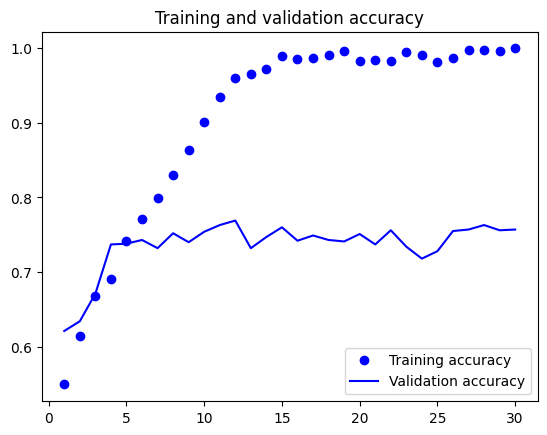

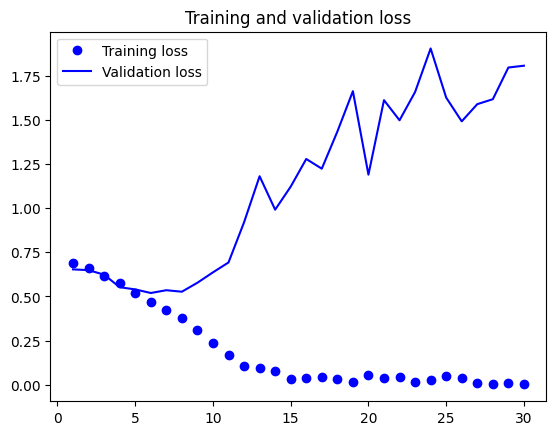

In [66]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [67]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 36ms/step - loss: 0.6054 - accuracy: 0.6920
Test accuracy: 0.692


In [68]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

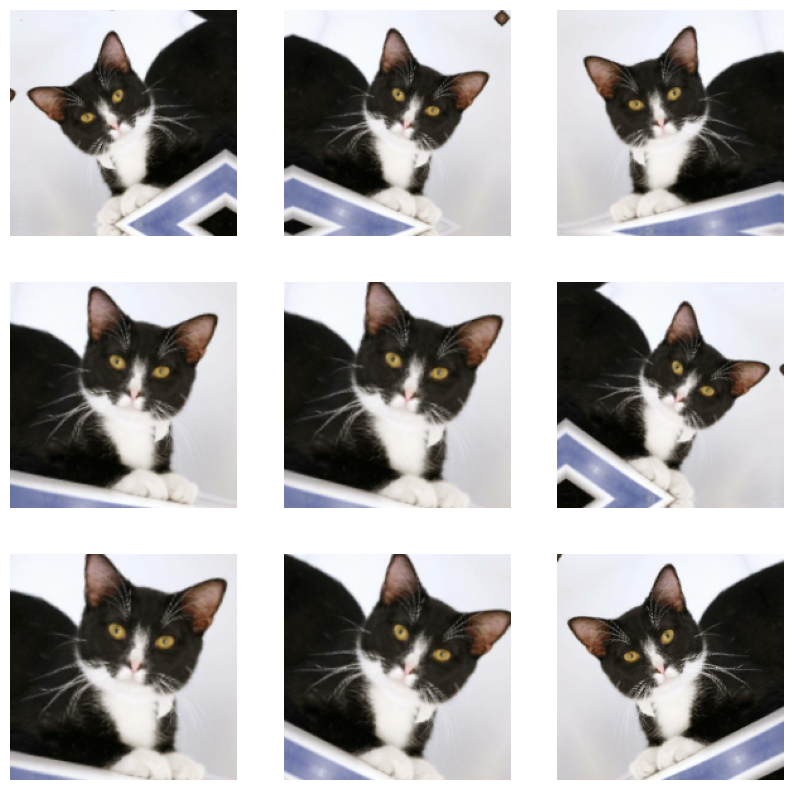

In [69]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [70]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [71]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
125/125 [==============================] - 10s 56ms/step - loss: 0.6936 - accuracy: 0.5163 - val_loss: 0.6917 - val_accuracy: 0.5210
Epoch 2/100
125/125 [==============================] - 7s 55ms/step - loss: 0.6921 - accuracy: 0.5100 - val_loss: 0.6903 - val_accuracy: 0.5010
Epoch 3/100
125/125 [==============================] - 8s 58ms/step - loss: 0.6842 - accuracy: 0.5435 - val_loss: 0.7352 - val_accuracy: 0.5130
Epoch 4/100
125/125 [==============================] - 8s 64ms/step - loss: 0.6677 - accuracy: 0.5880 - val_loss: 0.6694 - val_accuracy: 0.5280
Epoch 5/100
125/125 [==============================] - 9s 67ms/step - loss: 0.6497 - accuracy: 0.6152 - val_loss: 0.6163 - val_accuracy: 0.6640
Epoch 6/100
125/125 [==============================] - 7s 54ms/step - loss: 0.6345 - accuracy: 0.6395 - val_loss: 0.6498 - val_accuracy: 0.6340
Epoch 7/100
125/125 [==============================] - 8s 62ms/step - loss: 0.6151 - accuracy: 0.6570 - val_loss: 0.6434 - val_accuracy

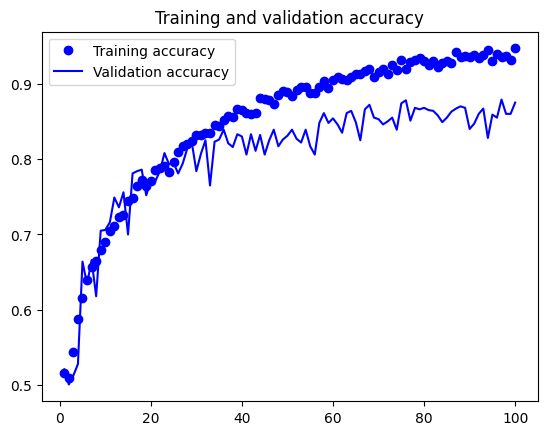

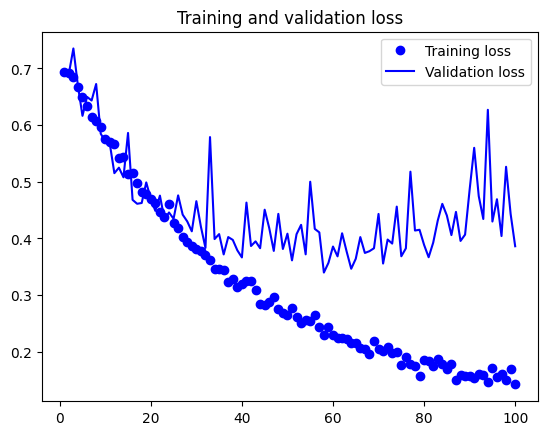

In [72]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [73]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.3900 - accuracy: 0.8380
Test accuracy: 0.838


In [74]:
conv_base = keras.applications.resnet50.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [75]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.resnet50.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 43ms/step


In [76]:
train_features.shape

(4000, 6, 6, 2048)

In [77]:
inputs = keras.Input(shape=(6, 6, 2048))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
125/125 [==============================] - 4s 22ms/step - loss: 6.8269 - accuracy: 0.9557 - val_loss: 3.0906 - val_accuracy: 0.9770
Epoch 2/20
125/125 [==============================] - 2s 17ms/step - loss: 1.3269 - accuracy: 0.9900 - val_loss: 2.5754 - val_accuracy: 0.9850
Epoch 3/20
125/125 [==============================] - 1s 11ms/step - loss: 0.5659 - accuracy: 0.9927 - val_loss: 3.2575 - val_accuracy: 0.9820
Epoch 4/20
125/125 [==============================] - 1s 11ms/step - loss: 0.9094 - accuracy: 0.9933 - val_loss: 5.1186 - val_accuracy: 0.9740
Epoch 5/20
125/125 [==============================] - 2s 13ms/step - loss: 0.4684 - accuracy: 0.9955 - val_loss: 4.2954 - val_accuracy: 0.9790
Epoch 6/20
125/125 [==============================] - 1s 11ms/step - loss: 0.4931 - accuracy: 0.9955 - val_loss: 6.4897 - val_accuracy: 0.9780
Epoch 7/20
125/125 [==============================] - 1s 12ms/step - loss: 0.4229 - accuracy: 0.9960 - val_loss: 4.3993 - val_accuracy: 0.9840

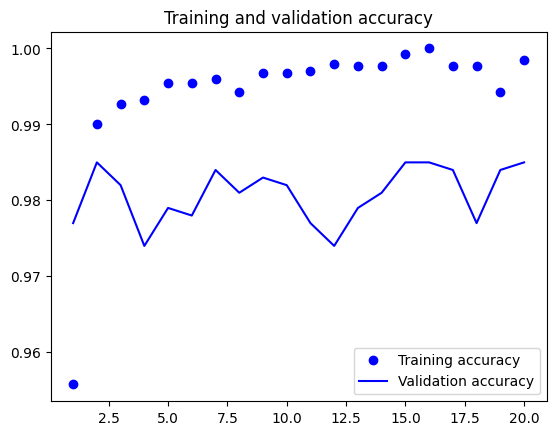

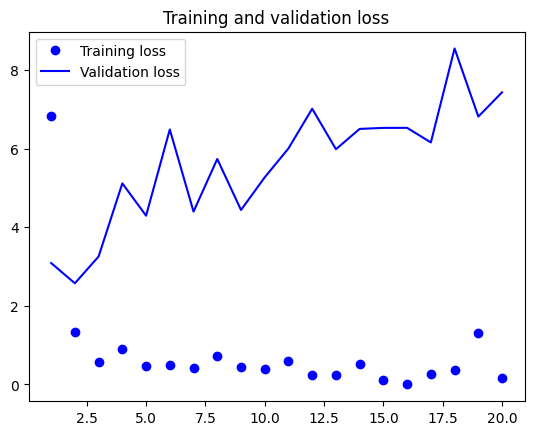

In [78]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [79]:
conv_base  = keras.applications.resnet50.ResNet50(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [80]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 212


In [81]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [82]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [83]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
125/125 [==============================] - 20s 119ms/step - loss: 8.1107 - accuracy: 0.9352 - val_loss: 2.1749 - val_accuracy: 0.9800
Epoch 2/50
125/125 [==============================] - 14s 112ms/step - loss: 4.5636 - accuracy: 0.9653 - val_loss: 1.9805 - val_accuracy: 0.9850
Epoch 3/50
125/125 [==============================] - 13s 102ms/step - loss: 3.5854 - accuracy: 0.9680 - val_loss: 2.1848 - val_accuracy: 0.9830
Epoch 4/50
125/125 [==============================] - 14s 113ms/step - loss: 3.3132 - accuracy: 0.9770 - val_loss: 1.5230 - val_accuracy: 0.9860
Epoch 5/50
125/125 [==============================] - 13s 103ms/step - loss: 2.3867 - accuracy: 0.9750 - val_loss: 1.9067 - val_accuracy: 0.9840
Epoch 6/50
125/125 [==============================] - 13s 103ms/step - loss: 1.9930 - accuracy: 0.9795 - val_loss: 1.6842 - val_accuracy: 0.9810
Epoch 7/50
125/125 [==============================] - 14s 113ms/step - loss: 1.8315 - accuracy: 0.9795 - val_loss: 1.4294 - val_ac

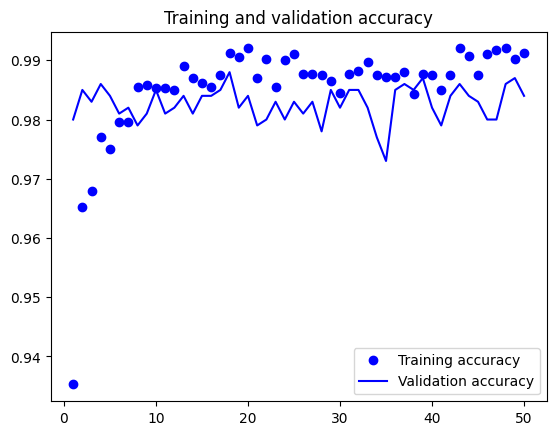

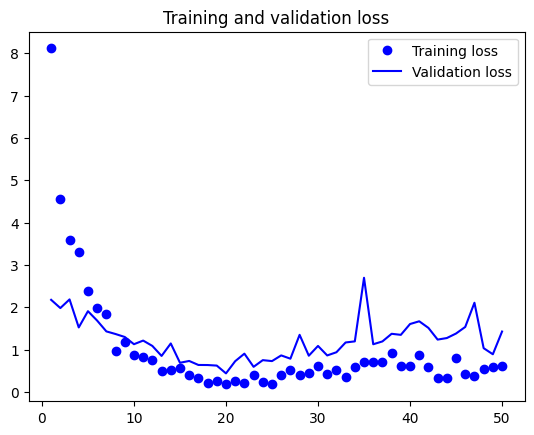

In [84]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [85]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 70ms/step - loss: 0.7217 - accuracy: 0.9800
Test accuracy: 0.980


In [86]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_14[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [87]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [88]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
125/125 [==============================] - 20s 124ms/step - loss: 1.8484 - accuracy: 0.9710 - val_loss: 1.3468 - val_accuracy: 0.9810
Epoch 2/30
125/125 [==============================] - 15s 117ms/step - loss: 0.7054 - accuracy: 0.9812 - val_loss: 1.0752 - val_accuracy: 0.9800
Epoch 3/30
125/125 [==============================] - 15s 120ms/step - loss: 0.4395 - accuracy: 0.9860 - val_loss: 0.6735 - val_accuracy: 0.9810
Epoch 4/30
125/125 [==============================] - 14s 107ms/step - loss: 0.2333 - accuracy: 0.9893 - val_loss: 0.8289 - val_accuracy: 0.9860
Epoch 5/30
125/125 [==============================] - 13s 106ms/step - loss: 0.3655 - accuracy: 0.9885 - val_loss: 1.0572 - val_accuracy: 0.9800
Epoch 6/30
125/125 [==============================] - 13s 106ms/step - loss: 0.2350 - accuracy: 0.9895 - val_loss: 0.9428 - val_accuracy: 0.9820
Epoch 7/30
125/125 [==============================] - 14s 107ms/step - loss: 0.1303 - accuracy: 0.9930 - val_loss: 0.7286 - val_ac

In [89]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 70ms/step - loss: 0.7884 - accuracy: 0.9810
Test accuracy: 0.981
